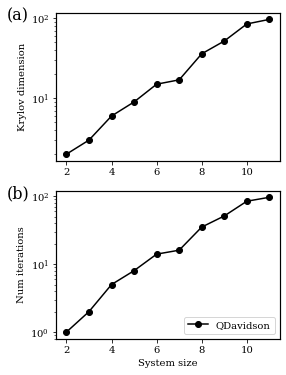

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# full_path = os.path.realpath(__file__)
# path, filename = os.path.split(full_path)
path = ""

kr_successes = []
qd_successes = []
Ms = []
log = True
eps = 1e-1
model = f"xyz_bias_{1-eps}"

qd = pd.read_csv(os.path.join(path, f"../results/{model}/qdavidson_11_0.txt"))
qd = qd[qd["fidelity"] > 1 - eps]

for M in Ms:
    krylov = pd.read_csv(os.path.join(path, f"../results/{model}/qkrylov_11_{M}_0.1_0.txt"))
    kr_successes.append(krylov[(krylov["fidelity"] > 1 - eps)]) # & (krylov["qubits"] % 2 == 0)])

    qdavidson = pd.read_csv(os.path.join(path, f"../results/{model}/mr_qdavidson_11_{M}_0.1_0.txt"))
    qd_successes.append(qdavidson[(qdavidson["fidelity"] > 1 - eps)]) # & (qdavidson["qubits"] % 2 == 0) ])


# -----------------------------------------------------------------------------

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern Roman'] + plt.rcParams['font.serif']
plt.rcParams['axes.linewidth'] = 1.2

# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93)]
# colors = [(239, 230, 69), (233, 53, 161), (0, 227, 255), (225, 86, 44), (83, 126, 255), (0, 203, 133)][::-1]
# colors = [(86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138), (152, 68, 100), (94, 204, 171)]
colors = [(c[0]/255, c[1]/255, c[2]/255) for c in colors]
# colors = sns.color_palette("hls", 6)
# colors = sns.color_palette("Set2", 6)

fig, ax = plt.subplots(2, 1, figsize=(4, 6))


ax[0].plot(qd["qubits"], qd["num_states"], "-o", label="QDavidson", color='k')
ax[1].plot(qd["qubits"], qd["num_iters"], "-o", label="QDavidson", color='k')

for i, qd_success in enumerate(qd_successes):
    ax[0].plot(qd_success["qubits"], qd_success["num_states"], "-o", label=f"QDavidson, M={Ms[i]}", color=colors[i])
    ax[1].plot(qd_success["qubits"], qd_success["num_iters"], "-o", label=f"QDavidson, M={Ms[i]}", color=colors[i])

for i, kr_success in enumerate(kr_successes):
    ax[0].plot(kr_success["qubits"], kr_success["num_states"], "--o", label=f"Multi-ref. Krylov, M={Ms[i]}", color=colors[i+1])
    ax[1].plot(kr_success["qubits"], kr_success["num_iters"], "--o", label=f"Multi-ref. Krylov, M={Ms[i]}", color=colors[i+1])

ax[0].text(-.22,.95,'(a)', transform=ax[0].transAxes, fontsize=16)
ax[1].text(-.22,.95,'(b)', transform=ax[1].transAxes, fontsize=16)

if (log):
    plt.legend(loc="lower right")
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')

else:
    plt.legend(loc="upper left")

# ax[0].set_xlabel("System size")
ax[1].set_xlabel("System size")
ax[0].set_ylabel("Krylov dimension")
ax[1].set_ylabel("Num iterations")

plt.show()
# plt.savefig(os.path.join(path, '../figures/qd_vs_mrk.png'), dpi=1000, transparent=False, bbox_inches='tight')
